In [6]:
from keras.datasets import mnist

(train_data,train_target),(test_data,test_target)=mnist.load_data()

In [7]:
print(train_data.shape)
print(test_data.shape)
print(train_target.shape)
print(test_target.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


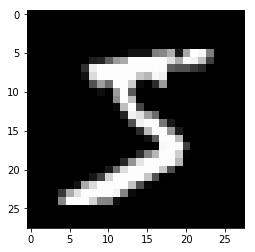

In [8]:
from matplotlib import pyplot as plt

plt.imshow(train_data[0],cmap='gray')
plt.show()

In [11]:
train_target[0]

5

In [17]:
from keras.models import Sequential
from keras.layers import Dense,Flatten

model=Sequential()

model.add(Flatten(input_shape=(28,28)))

model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_7 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_8 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_9 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_10 (Dense)             (None, 10)                650       
Total params: 575,050
Trainable params: 575,050
Non-trainable params: 0
________________________________________________

In [18]:
from keras.utils import np_utils

new_train_target=np_utils.to_categorical(train_target)
new_test_target=np_utils.to_categorical(test_target)

print(train_target[:10])
print(new_train_target[:10])

[5 0 4 1 9 2 1 3 1 4]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [19]:
new_train_data=train_data/255
new_test_data=test_data/255

In [20]:
model.fit(new_train_data,new_train_target,epochs=20)

Epoch 1/20
60000/60000 [==============================] - 12s 193us/step - loss: 0.2083 - accuracy: 0.9375
Epoch 2/20
60000/60000 [==============================] - 11s 188us/step - loss: 0.0958 - accuracy: 0.9713
Epoch 3/20
60000/60000 [==============================] - 11s 186us/step - loss: 0.0685 - accuracy: 0.9791
Epoch 4/20
60000/60000 [==============================] - 11s 183us/step - loss: 0.0534 - accuracy: 0.9842
Epoch 5/20
60000/60000 [==============================] - 11s 189us/step - loss: 0.0441 - accuracy: 0.9873
Epoch 6/20
60000/60000 [==============================] - 11s 187us/step - loss: 0.0341 - accuracy: 0.9900
Epoch 7/20
60000/60000 [==============================] - 11s 187us/step - loss: 0.0346 - accuracy: 0.9893
Epoch 8/20
60000/60000 [==============================] - 11s 189us/step - loss: 0.0260 - accuracy: 0.9923
Epoch 9/20
60000/60000 [==============================] - 11s 183us/step - loss: 0.0271 - accuracy: 0.9924
Epoch 10/20
60000/60000 [============

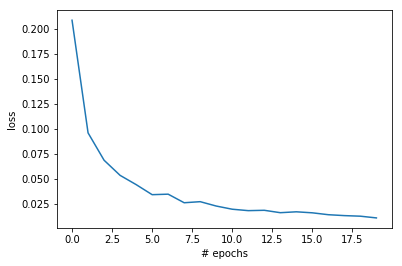

In [21]:
from matplotlib import pyplot as plt

plt.plot(model.history.history['loss'])
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.show()

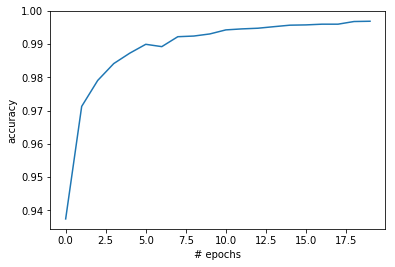

In [22]:
plt.plot(model.history.history['accuracy'])
plt.xlabel('# epochs')
plt.ylabel('accuracy')
plt.show()

In [23]:
model.evaluate(new_test_data,new_test_target)

10000/10000 [==============================] - 0s 37us/step


[0.11546532502148807, 0.9821000099182129]

In [24]:
model.save_weights('FFNN-MNIST.h5')